In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
# nltk.download('stopwords')
# nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape

(50000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

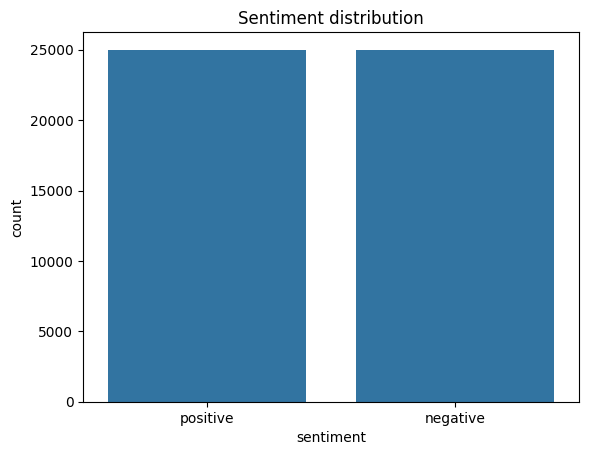

In [5]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [47]:
for i in range(5):
    print("Review: ", i+1)
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  1
one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well manner

In [7]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [8]:
df['word count'] = df['review'].apply(no_of_words)

In [9]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


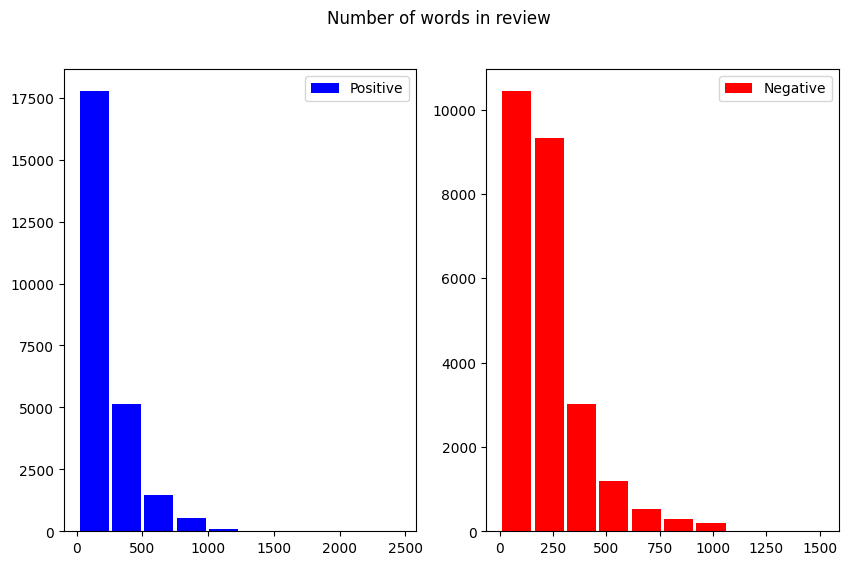

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

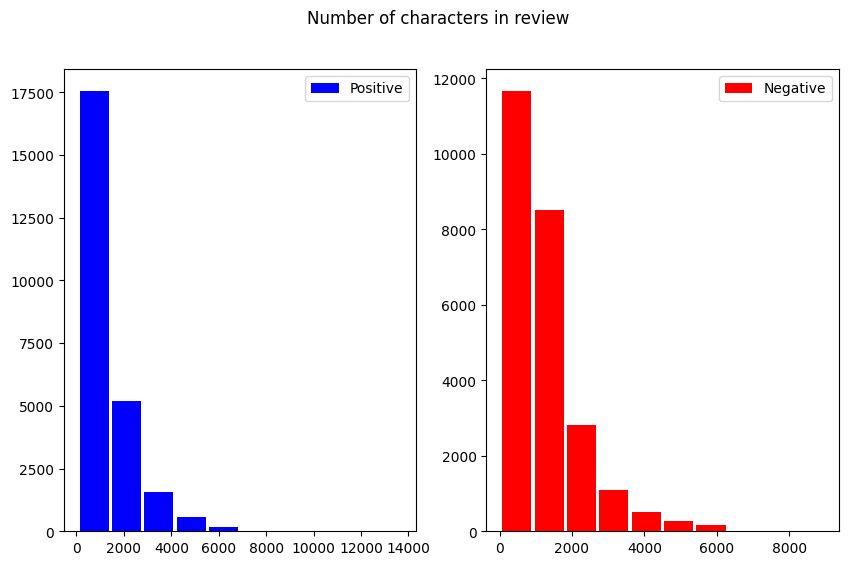

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of characters in review")
plt.show()

In [12]:
df['sentiment'] = df['sentiment'].replace({"positive": 1, "negative": 0})

C:\Users\harsh\AppData\Local\Temp\ipykernel_15920\3062220299.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'] = df['sentiment'].replace({"positive": 1, "negative": 0})


In [13]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [14]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [15]:
df.review = df['review'].apply(data_processing)

In [16]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [17]:
df = df.drop_duplicates('review')

In [19]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [20]:
df.review = df['review'].apply(lambda x: stemming(x))

In [21]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


In [22]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


In [23]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [24]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


In [26]:
neg_reviews =  df[df.sentiment == 2]
neg_reviews.head()

,review,sentiment,word count


In [28]:

count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[]

In [30]:
# neg_words = pd.DataFrame(count.most_common(15))
# neg_words.columns = ['word', 'count']
neg_words = pd.DataFrame(count.most_common(15), columns=['word', 'count'])
neg_words.head()

,word,count


In [31]:
X = df['review']
Y = df['sentiment']

In [32]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [34]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 221707)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221707)
Size of y_test:  (14874,)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [36]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.06%


In [37]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6457  904]
 [ 723 6790]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.88      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [38]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.44%


In [39]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6418  943]
 [1074 6439]]


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7361
           1       0.87      0.86      0.86      7513

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [40]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.22%


In [41]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6504  857]
 [ 747 6766]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [43]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.41%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6511  850]
 [ 725 6788]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.90      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874

